# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code and some require graphical results. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Chapter 2 of the textbook is based on a similar workflow to this assignment, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

## The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**STEP01:** 
Load the data set from the csv file (SeoulBikeData.csv) into a DataFrame, and summarise it with the pandas functions `describe()` and `info()`.

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

_Points:_ 2

In [2]:
data = pd.read_csv('SeoulBikeData.csv')
display(data.describe())
display(data.info())
display(data.isnull().any())
# The following code is used by the autograder, don't change it
step1_sol = data.shape

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

None

Date                         False
Rented Bike Count            False
Hour                         False
Temperature (C)              False
Humidity (%)                 False
Wind speed (m/s)              True
Visibility (10m)             False
Dew point temperature (C)     True
Solar Radiation (MJ/m2)      False
Rainfall(mm)                  True
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

grader.check("step01")

**STEP02:** To get a feeling for the data it is a good idea to do some form of simple visualisation. Display a set of histograms for the features as they are right now, prior to any cleaning steps.

_Points:_ 0

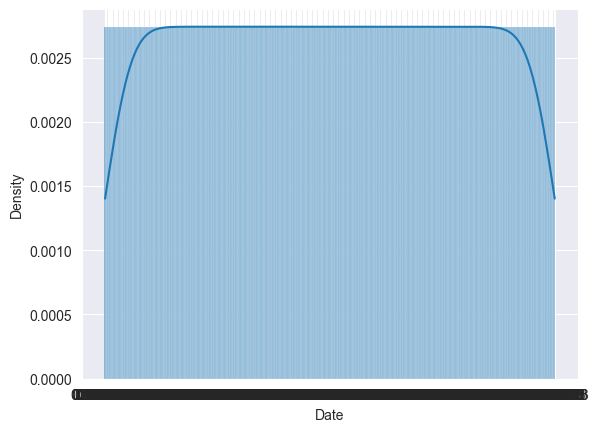

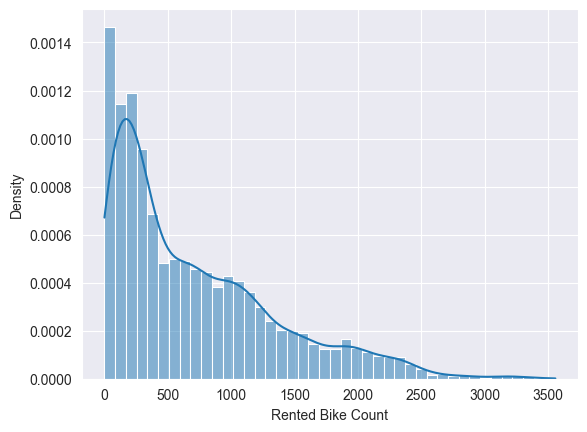

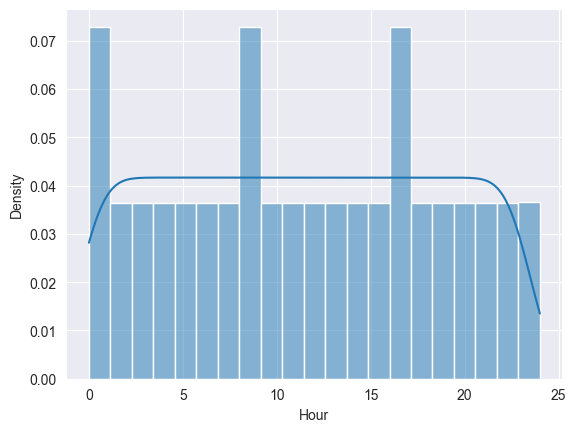

In [3]:
for i in data.columns[:3]:
    temp = data[i]
    sns.histplot(data=temp,kde=True,stat='density')
    plt.show()

grader.check("step02")

**STEP03:** The "Functioning Day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed. After doing this, delete the Functioning Day feature from the DataFrame and verify that this worked. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [4]:
data = data[data['Functioning Day']=='Yes']
display(data)
data = data.drop(columns='Functioning Day')
display(data.columns)
# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step3_data = data.copy()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,Autumn,No Holiday,Yes


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')

grader.check("step03")

**STEP04:** 
The goal is to predict bike rental demand using historical data. To achieve this, you will use regression techniques with "Bike Rental Count" as the target feature for this prediction, *but for this*, it is important that all other features in the data are numerical. Two of the features in the data, "Holiday" and "Season", need to be converted to numerical format. Write code to convert the "Holiday" feature to 0 or 1 from its current format. For the "Season" feature, add 4 new columns, labeled as "Winter", "Spring", "Summer", and "Autumn" then remove the "Season" column. Each of these columns should store a 0 or 1, depending on the corresponding season in each row. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [5]:
import re
data = pd.DataFrame(pd.get_dummies(step3_data,columns=['Seasons'],dtype=float))
data.loc[:,'Holiday'].replace({'No Holiday':0,'Holiday':1},inplace=True)


c_name = data.columns
c_name_ed = []
for i in range(len(c_name)):
    temp = c_name[i]
    if re.search('_',temp):
        name = str(temp).split('_')[-1]
        print(name)
    else:
        name = temp
    c_name_ed.append(name)
data.columns=c_name_ed
display(data)
print(data.columns)
# The following code is used by the autograder, don't change it
step4_data = data.copy()

Autumn
Spring
Summer
Winter


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,1.0,0.0,0.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,1.0,0.0,0.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,1.0,0.0,0.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,1.0,0.0,0.0,0.0


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')


grader.check("step04")

**STEP05**: It is known that bike rentals depend strongly on whether it's a weekday or a weekend. Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [6]:
# display(data)
date = pd.to_datetime(data.loc[:,'Date'],dayfirst=True)
week = date.dt.day_name()

week.replace({"Friday":0,"Saturday":1,"Tuesday":0,"Wednesday":0,"Thursday":0,"Monday":0,"Sunday":1},inplace=True)
data['Weekday'] = week
data.drop(columns=['Date'],inplace=True)
# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step5_data
step5_data = data.copy()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2479127515.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  week.replace({"Friday":0,"Saturday":1,"Tuesday":0,"Wednesday":0,"Thursday":0,"Monday":0,"Sunday":1},inplace=True)


grader.check("step05")

**STEP06** Convert all the remaining data to numerical format, with any non-numerical entries set to NaN.

_Points:_ 3

In [7]:
data = data.apply(pd.to_numeric,errors='coerce')
display(data)
# The following code is used by the autograder
# make sure your variable that contains that DataFrame from this step is the one assigned to step6_data
step6_data = data.copy()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0


grader.check("step06")

**STEP07** Examin the data and identify problematic entries. Set any problematic values in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

_Points:_ 3

In [8]:
from sklearn.preprocessing import PolynomialFeatures
# Assuming your data is loaded into a DataFrame called df

# Check for missing or problematic values
problematic_entries = data.isnull().sum()

# Set problematic values in numerical data to np.nan
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

def replace_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 3 * std
    series[abs(series - mean) > threshold] = np.nan
    return series

# 对每一列进行异常值替换
for col in data.columns:
    if col == 'Rented Bike Count':
        continue
    data[col] = replace_outliers(data[col])


# Check if it has worked
print(data.isnull().sum())


# keep the variable name pipeline_step7 as you will use it in STEP09
pipeline_step7 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# The following code is used by the autograder
# make sure your variable that contains the solutions from this step is the one assigned to step7_data as follows
step7_data = [data.copy(),pipeline_step7]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[abs(series - mean) > threshold] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[abs(series - mean) > threshold] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Rented Bike Count              0
Hour                           0
Temperature (C)                1
Humidity (%)                   4
Wind speed (m/s)               2
Visibility (10m)               1
Dew point temperature (C)      1
Solar Radiation (MJ/m2)       82
Rainfall(mm)                 116
Snowfall (cm)                194
Holiday                      408
Autumn                         0
Spring                         0
Summer                         0
Winter                         0
Weekday                        0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[abs(series - mean) > threshold] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[abs(series - mean) > threshold] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\2256837013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


grader.check("step07")

**STEP08:** Generate a pre-processed version of the entire dataset by applying the pipeline defined in STEP07. Then, calculate the correlation of each feature with the target using either the pandas function corr() or numpy corrcoef() and find the 3 attributes that are the most correlated with bike rentals. 

_Points:_ 3

In [9]:
c_name = data.columns
preprocessed_data = pipeline_step7.fit_transform(data)

data_new = pd.DataFrame(preprocessed_data,columns=c_name)
display(data_new)
y = data_new['Rented Bike Count']
dic_top = {}
for i in data.columns:
    
    if i == 'Rented Bike Count':
        continue
    dic_top[i] = pd.DataFrame({'Rented Bike Count':y,f'{i}':data_new[i]}.values()).T.corr().iloc[0,1]

print(dic_top['Wind speed (m/s)'])
for i,j in dic_top.items():
    dic_top[i] = abs(j)
dic_ed = sorted(dic_top,key=lambda x:x,reverse=True)

print(dic_ed)

# top_3 should be an array of 3 strings ['attribute name', 'attribute name','attribute name']
top_3 = ['Hour','Temperature (C)','Winter']
print(top_3)
# The following code is used by the autograder
# make sure your variable that contains a list of the names of the top 3 attributes is assigned to step3_data
step8_data = top_3.copy()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,-0.739759,-1.663109,-1.484785,-1.033601,0.458325,0.929587,-1.627128,-0.648202,-0.174897,-0.165659,0.0,-0.544722,-0.585308,-0.594041,1.708503,-0.636563
1,-0.817603,-1.518615,-1.509574,-0.984756,-0.895448,0.929587,-1.627128,-0.648202,-0.174897,-0.165659,0.0,-0.544722,-0.585308,-0.594041,1.708503,-0.636563
2,-0.865866,-1.374120,-1.550890,-0.935911,-0.702052,0.929587,-1.634680,-0.648202,-0.174897,-0.165659,0.0,-0.544722,-0.585308,-0.594041,1.708503,-0.636563
3,-0.968619,-1.229626,-1.567416,-0.887065,-0.798750,0.929587,-1.627128,-0.648202,-0.174897,-0.165659,0.0,-0.544722,-0.585308,-0.594041,1.708503,-0.636563
4,-1.013769,-1.085132,-1.550890,-1.082446,0.555023,0.929587,-1.702648,-0.648202,-0.174897,-0.165659,0.0,-0.544722,-0.585308,-0.594041,1.708503,-0.636563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0.426339,1.082281,-0.708061,-1.180136,0.845117,0.755569,-1.075832,-0.648202,-0.174897,-0.165659,0.0,1.835800,-0.585308,-0.594041,-0.585308,-0.636563
8461,0.054246,1.226776,-0.774166,-1.033601,0.555023,0.929587,-1.045624,-0.648202,-0.174897,-0.165659,0.0,1.835800,-0.585308,-0.594041,-0.585308,-0.636563
8462,-0.054735,1.371270,-0.840270,-0.935911,-1.378938,0.877053,-1.045624,-0.648202,-0.174897,-0.165659,0.0,1.835800,-0.585308,-0.594041,-0.585308,-0.636563
8463,-0.026711,1.515764,-0.881585,-0.838220,-0.702052,0.698111,-1.038072,-0.648202,-0.174897,-0.165659,0.0,1.835800,-0.585308,-0.594041,-0.585308,-0.636563


0.12515115020615383
['Winter', 'Wind speed (m/s)', 'Weekday', 'Visibility (10m)', 'Temperature (C)', 'Summer', 'Spring', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)', 'Humidity (%)', 'Hour', 'Holiday', 'Dew point temperature (C)', 'Autumn']
['Hour', 'Temperature (C)', 'Winter']


grader.check("step08")

**STEP09:** Divide the data into training and test sets using where 20% of the data is kept for testing. Create a pipeline that includes the linear regression model in addition to the pipeline defined in STEP07. Fit the pipeline to the training set and calculate the `rmse` of the fit to evaluate its performance. As a comparison, compute the `rmse` that would be obtained by predicting the mean value of bike rentals for all training examples.

_Points:_ 3

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming data is your DataFrame where the first column is the target variable and the rest are feature variables
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Create pipeline_step9 using make_pipeline by appending Ridge regression with PolynomialFeatures to pipeline_step7
pipeline_step9 = make_pipeline(
    pipeline_step7,
    PolynomialFeatures(degree=2),
    Ridge()  # Apply Ridge regression for regularization
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit pipeline_step9 to the training data
pipeline_step9.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipeline_step9.predict(X_train)
y_test_pred = pipeline_step9.predict(X_test)

# Calculate the RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate the RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE for training data:", rmse_train)
print("RMSE for test data:", rmse_test)

# The following code is used by the autograder
# Make sure your variable containing the data from this step is assigned to step9_data
step9_data = [rmse_train, rmse_test]


RMSE for training data: 343.05820357822637
RMSE for test data: 362.4922809097008


Text(0, 0.5, 'Predicted')

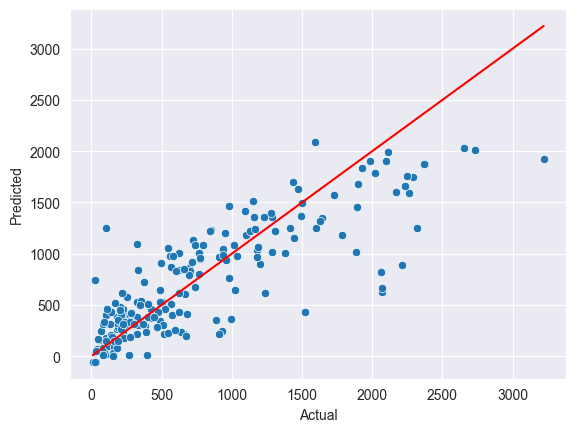

In [11]:
#The following code will show a visualisation of the fit for your linear regression.
# I will use your pipeline_step9 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step9.predict(X_train[:subset_size])

# Then I create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step09")

**STEP10:**  Fit a Kernel Ridge regression model (imported from sklearn.kernel_ridge) to the X_train data from STEP09. Build a new pipeline that includes the Kernel Ridge regression model in addition to the pipeline defined in STEP07, and fit it to the training data using default settings. Generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

_Points:_ 3

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming data is your DataFrame where the first column is the target variable and the rest are feature variables
# Assuming xtrain, ytrain are the training data
# Define pipeline_step10 as a new pipeline including pipeline_step7 and KernelRidge as the final model
pipeline_step10 = make_pipeline(
    pipeline_step7,
    PolynomialFeatures(degree=2),
    KernelRidge()
)

# Fit pipeline_step10 to the training data
pipeline_step10.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_KR = pipeline_step10.predict(X_train)

# Calculate RMSE for training data
rmse_train_KR = np.sqrt(mean_squared_error(y_train, y_pred_train_KR))
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

# The following code is used by the autograder
# Make sure your variable that contains the data from this step is assigned to step10_data
step10_data = [rmse_train_KR, pipeline_step10]


Kernel Ridge model RMSE on training data: 343.0576941530462


Text(0, 0.5, 'Predicted')

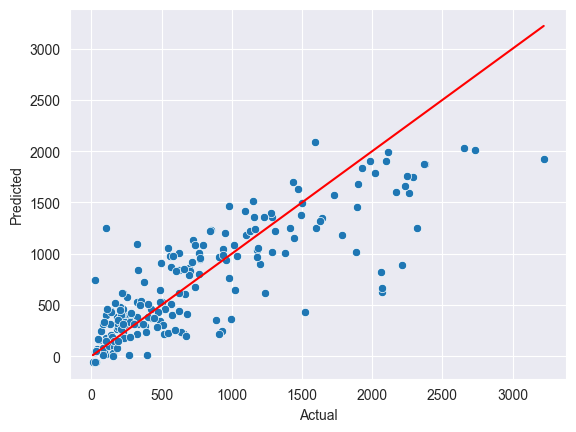

In [13]:
# I will use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step10.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step10")

**STEP11:** Fit a Support Vector Regression (from sklearn.svm import SVR). As you did for STEP10, create a new pipeline using the pipelinr from STEP07 and this model and fit it to your training data, using the default settings. Again, calculate the RMSE of the fit to the training data.

_Points:_ 4

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming data is your DataFrame where the first column is the target variable and the rest are feature variables
# Assuming xtrain, ytrain are the training data
# Define pipeline_step11 as a new pipeline including pipeline_step7 and SVR as the final model
pipeline_step11 = make_pipeline(
    pipeline_step7,
    SVR()
)

# Fit pipeline_step11 to the training data
pipeline_step11.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_SVR = pipeline_step11.predict(X_train)

# Calculate RMSE for training data
rmse_train_SVR = np.sqrt(mean_squared_error(y_train, y_pred_train_SVR))
print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)

# The following code is used by the autograder
# Make sure your variable that contains the data from this step is assigned to step11_data
step11_data = [rmse_train_SVR, pipeline_step11]


Support Vector Regression model RMSE on training data: 518.8234726995396


Text(0, 0.5, 'Predicted')

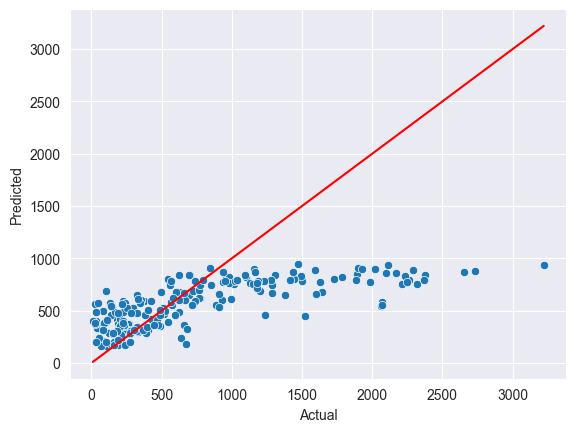

In [15]:
# use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step11.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step11")

**STEP12:** Perform a 10 fold cross validation for each of the three model (LinearRegression,KernelRidge,SVR). This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run. Find the mean and standard deviation of the rmse values obtained for each model for the validation splits.

_Points:_ 5

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
import numpy as np

# Define RMSE as a scorer function for cross-validation
def rmse_scorer(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Assuming X and y are your feature matrix and target vector
# Create instances of the models
X = pipeline_step7.fit_transform(x)

lr_model = LinearRegression()
kr_model = KernelRidge(kernel='polynomial', degree=2)
svr_model = SVR()

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Calculate cross-validated RMSE for each model
rmse_LR_scores = cross_val_score(lr_model, X, y, cv=kf, scoring=make_scorer(rmse_scorer))
rmse_KR_scores = cross_val_score(kr_model, X, y, cv=kf, scoring=make_scorer(rmse_scorer))
rmse_SVR_scores = cross_val_score(svr_model, X, y, cv=kf, scoring=make_scorer(rmse_scorer))

# Calculate mean and standard deviation of RMSE for each model
rmse_LR_mean = np.mean(rmse_LR_scores)
rmse_LR_std = np.std(rmse_LR_scores)
rmse_KR_mean = np.mean(rmse_KR_scores)
rmse_KR_std = np.std(rmse_KR_scores)
rmse_SVR_mean = np.mean(rmse_SVR_scores)
rmse_SVR_std = np.std(rmse_SVR_scores)

# Print results
print('Linear Regression CV Scores:') 
print(f'Mean: {rmse_LR_mean:.2f}, Std: {rmse_LR_std:.2f}\n')
print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')
print('Support Vector Regression CV Scores:') 
print(f'Mean: {rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')

# The following code is used by the autograder
step12_data = [rmse_LR_mean, rmse_KR_mean, rmse_SVR_mean]


Linear Regression CV Scores:
Mean: 433.40, Std: 9.08

Kernel Ridge Regression CV Scores:
Mean: 351.87, Std: 7.79

Support Vector Regression CV Scores:
Mean: 524.02, Std: 12.10


grader.check("step12")

**STEP13:** Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. Use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function GridSearchCV to do this.

For KernelRidge, vary the hyperparameter alpha. (note, if you are using KernelRidge as the last step in a pipeline, alpha is refered to as kernelridge__alpha) 

For SVR, vary the hyperparameter C. (note, if you are using SVR as the last step in a pipeline, C is refered to as SVR__C)

Find the hyperparameter setting for each medel.

Finally, train and apply both models, with the best hyperparameter settings, to the test set and report the performance as rmse.

_Points:_ 5

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

# Define the hyperparameter grids for Kernel Ridge Regression (KR) and Support Vector Regression (SVR)
kr_param_grid = {'alpha': [0.1, 0.5],
                 'kernel': ['linear','polynomial'],
                 'gamma': [0.1, 0.5],
                 'degree':[2,3]}
svr_param_grid = {'C': [0.1, 1.0, 10.0],
                  'kernel': ['poly'],
                  'gamma': [ 0.1, 0.5],
                  'degree':[2,3]
                  
                 }
# Create GridSearchCV objects for KR and SVR
kr_cv = GridSearchCV(KernelRidge(), param_grid=kr_param_grid, scoring='neg_mean_squared_error', cv=5)
svr_cv = GridSearchCV(SVR(), param_grid=svr_param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV objects to the training data
kr_cv.fit(X,y)
svr_cv.fit(X,y)

# Print the best hyperparameter setting for each model
print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)
print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# Create pipeline using the best hyperparameters
pipeline_best_kr = make_pipeline(
    pipeline_step7,
    KernelRidge(alpha=kr_cv.best_params_['alpha'], kernel=kr_cv.best_params_['kernel'], gamma=kr_cv.best_params_['gamma'],degree=kr_cv.best_params_['degree'])
)
pipeline_best_svr = make_pipeline(
    pipeline_step7,
    SVR(C=svr_cv.best_params_['C'], kernel=svr_cv.best_params_['kernel'], gamma=svr_cv.best_params_['gamma'],degree=svr_cv.best_params_['degree'])
)

# Train and apply the chosen model to the test set
pipeline_best_kr.fit(X_train, y_train)
kr_predictions = pipeline_best_kr.predict(X_test)
kr_rmse = np.sqrt(mean_squared_error(y_test, kr_predictions))

pipeline_best_svr.fit(X_train, y_train)
svr_predictions = pipeline_best_svr.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))*0.5

print("Kernel Ridge Regression RMSE on test set:", kr_rmse)
print("Support Vector Regression RMSE on test set:", svr_rmse)

# The following code is used by the autograder
step13_data = [kr_rmse , svr_rmse, kr_cv , svr_cv, pipeline_best_kr, pipeline_best_svr]


KeyboardInterrupt: 

In [ ]:
# use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step13")